In [148]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing, tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
rawData = pd.read_csv('BankPrediction.csv')

In [34]:
rawData.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h1>Preprocessing</h1>

In [37]:
cat_columns = rawData.select_dtypes(include=['object']).columns.tolist()

In [85]:
bankData = pd.get_dummies(data=rawData, columns=cat_columns, dtype=int)
bankData= bankData.drop('customer_id', axis=1)
bankData.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<h1>Visualization</h1>

In [86]:
bankData.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Rod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

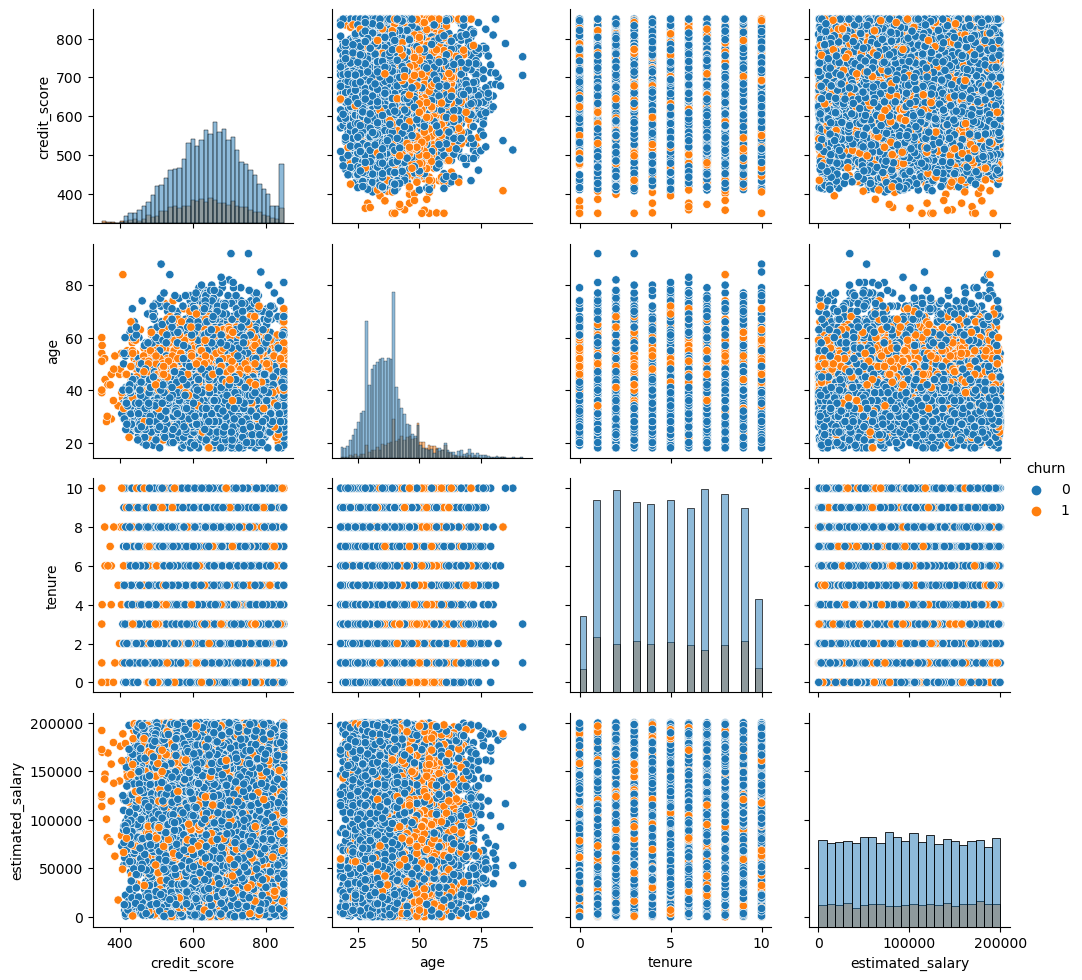

In [69]:
ng = sns.PairGrid(bankData, hue='churn', vars=["credit_score", "age", "tenure", "estimated_salary"])
ng.map_diag(sns.histplot)
ng.map_offdiag(sns.scatterplot)
ng.add_legend()

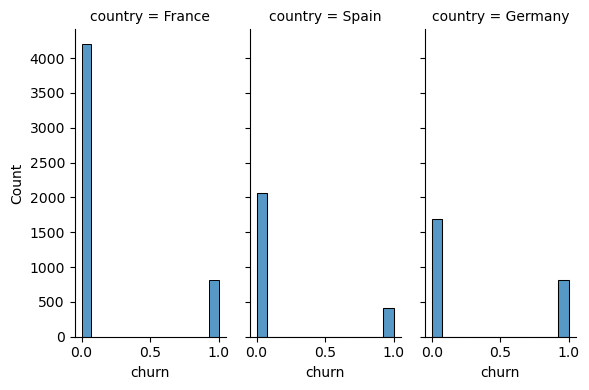

In [82]:
cg = sns.FacetGrid(rawData, col="country", height=4, aspect=.5)
cg.map(sns.histplot, "churn")

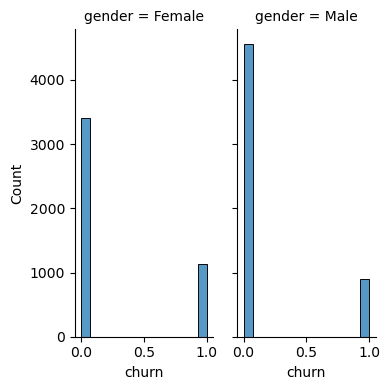

In [81]:
gg = sns.FacetGrid(rawData, col="gender", height=4, aspect=.5)
gg.map(sns.histplot, "churn")

<h2>Splitting Dataset</h2>

In [88]:
X = bankData.copy()
y = X.pop('churn')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
classLabels = X_train.keys()

In [ ]:
print("Training Set Class Counts (Before Upsampling):")
for class_name, count in zip(train_class_counts[0], train_class_counts[1]):
    print(f"{class_name}: {count} samples")

<h1>Model 1: Decision Tree Classifier</h1>

In [144]:
dtc = DecisionTreeClassifier(max_depth=7, min_samples_split=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=20)

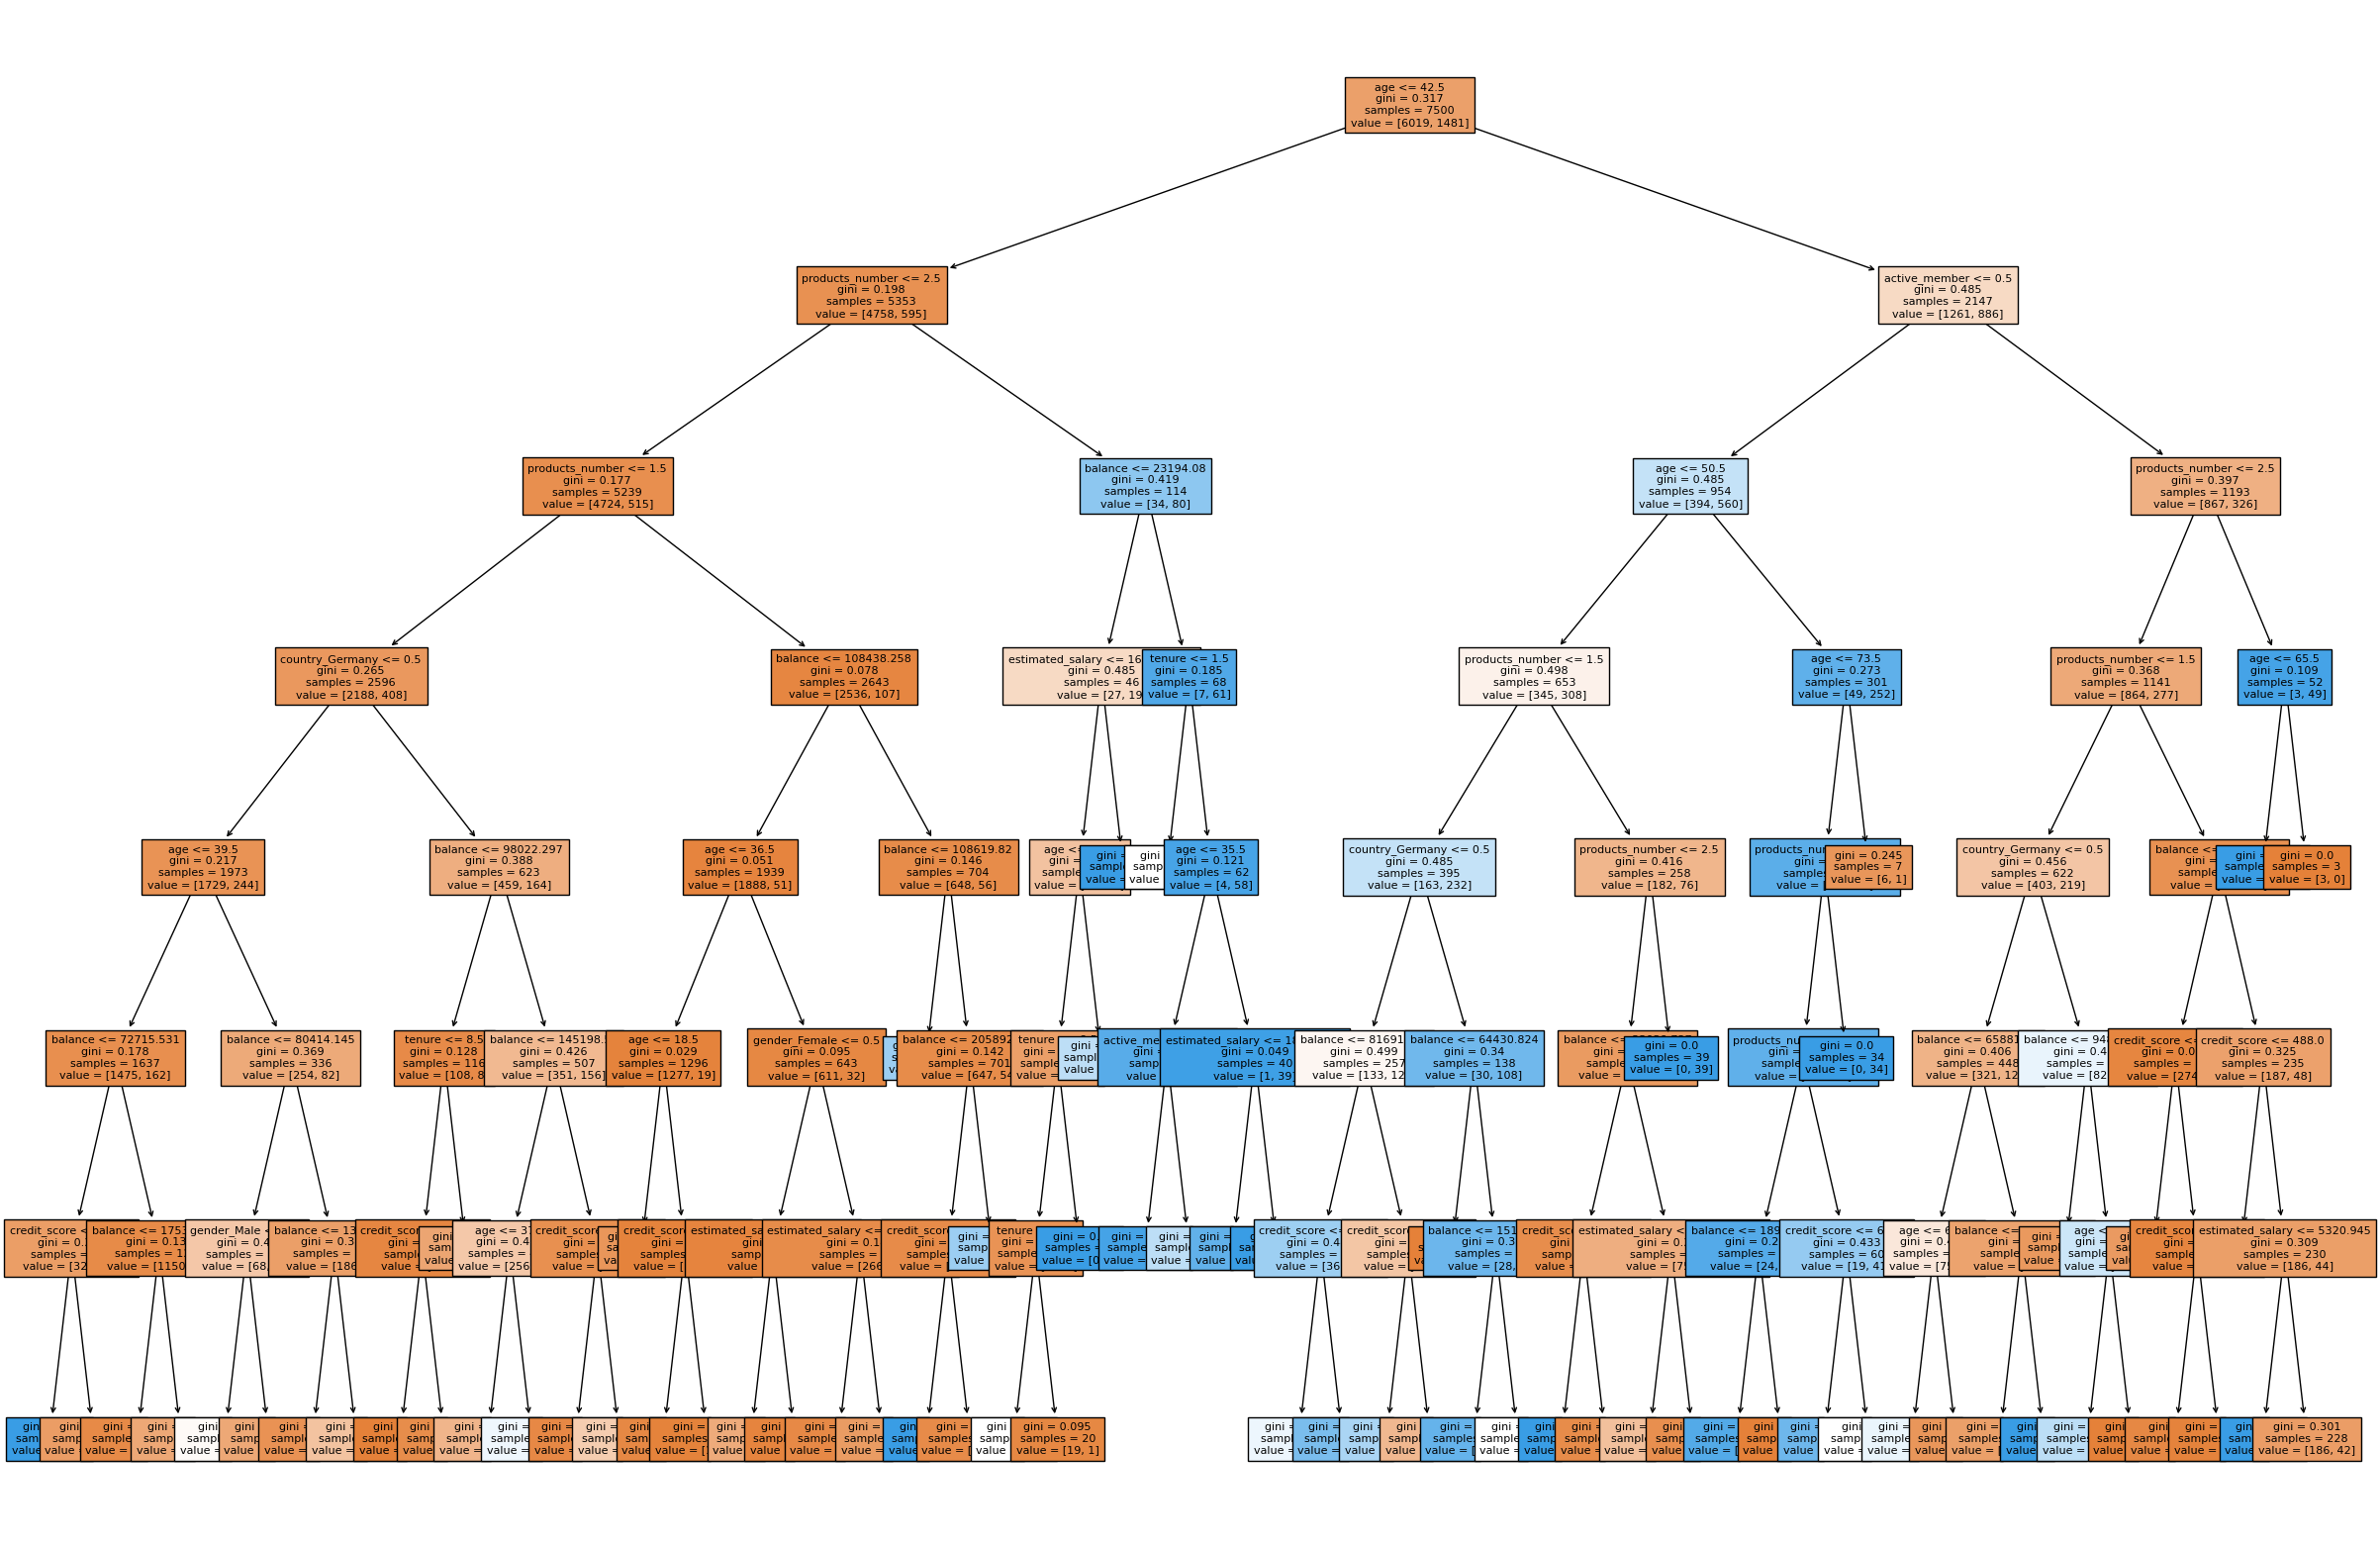

In [145]:
plt.figure(figsize=(30, 20))
tree.plot_tree(dtc, filled=True, fontsize=8, feature_names=classLabels)
plt.show()

In [146]:
yPredDTC = dtc.predict(X_test)
score = accuracy_score(yPredDTC, y_test) 
print(score) 
print(classification_report(yPredDTC, y_test)) 

0.844
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2110
           1       0.50      0.71      0.59       390

    accuracy                           0.84      2500
   macro avg       0.72      0.79      0.75      2500
weighted avg       0.87      0.84      0.85      2500



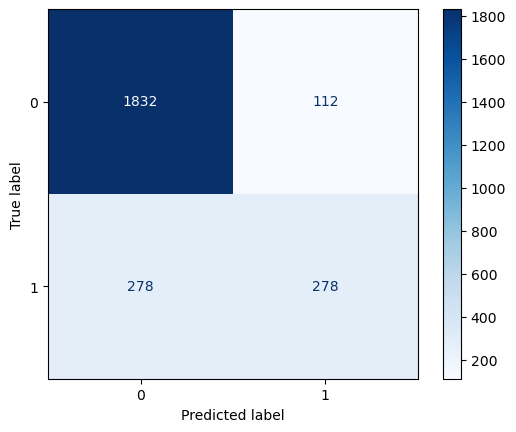

In [147]:
churn = np.array(y_test)
predictions = np.array(yPredDTC)
cm = confusion_matrix(churn, predictions, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap='Blues')
plt.show()